In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [107]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
X.shape, y.shape

((100, 2), (100, 1))

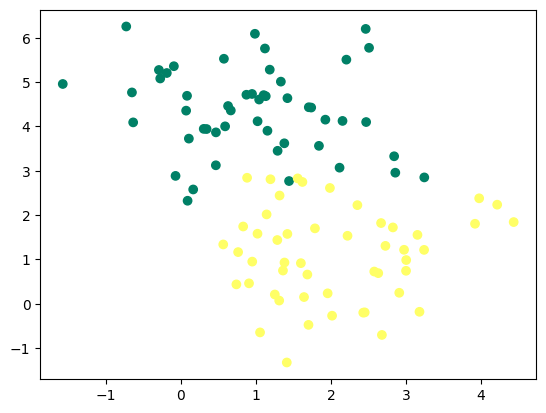

In [108]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')

In [109]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

In [110]:
def model(X, W, b):
    Z = X @ W + b
    A = 1 / (1+np.exp(-Z))
    return A

In [111]:
def log_loss(A, y):
    return 1/y.shape[0] * np.sum(-y * np.log(A) - (1-y) * np.log(1 - A))

In [112]:
def gradient(A, X, y):
    dW = 1/y.shape[0] * X.T @ (A - y)
    db = 1/y.shape[0] * np.sum(A - y)
    return dW, db

In [113]:
def update(W, b, dW, db, alpha):
    W = W - alpha * dW
    b = b - alpha * db
    return W, b

In [114]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [115]:
def artifical_neuron(X, y, alpha=0.01, nb_iteration=100):
    W, b = initialisation(X)
    loss = []
    for _ in range(nb_iteration):
        A = model(X, W, b)
        L = log_loss(A, y)
        dW, db = gradient(A, X, y)
        W, b = update(W, b, dW, db, alpha)
        loss.append(L)
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    return loss, W

0.6


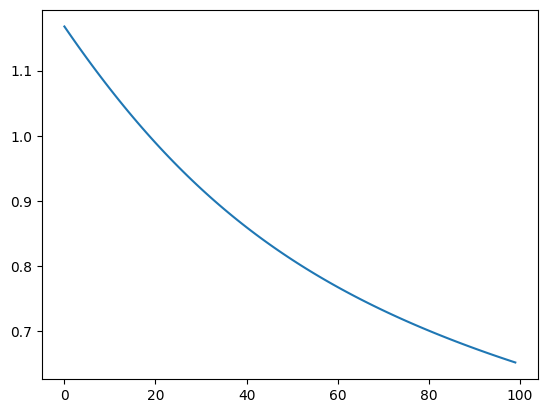

In [116]:
loss, W = artifical_neuron(X, y)
plt.plot(loss)

In [117]:
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

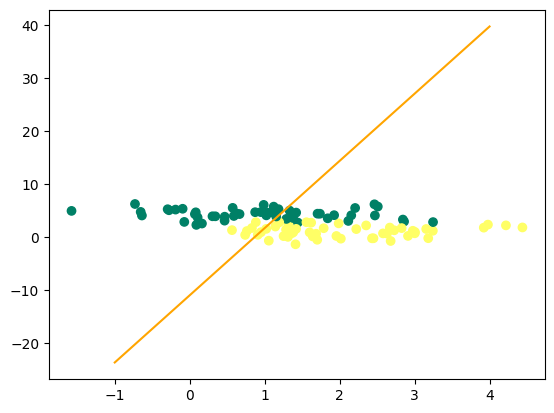

In [118]:
plt.plot(x0, x1, c='orange')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')